In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for styling
import os
import pickle

In [64]:
df=pd.read_csv("C:/Users/danis/Desktop/research paper/wine_work/White Wine Quality Prediction Using Python/Dataset/winequality-white.csv", sep=";", encoding="ISO-8859-1", engine="python", index_col=None)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
data_description=df.describe().T
data_description

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [67]:
missing_values=df.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [68]:
df.drop_duplicates(keep='first', inplace=True)

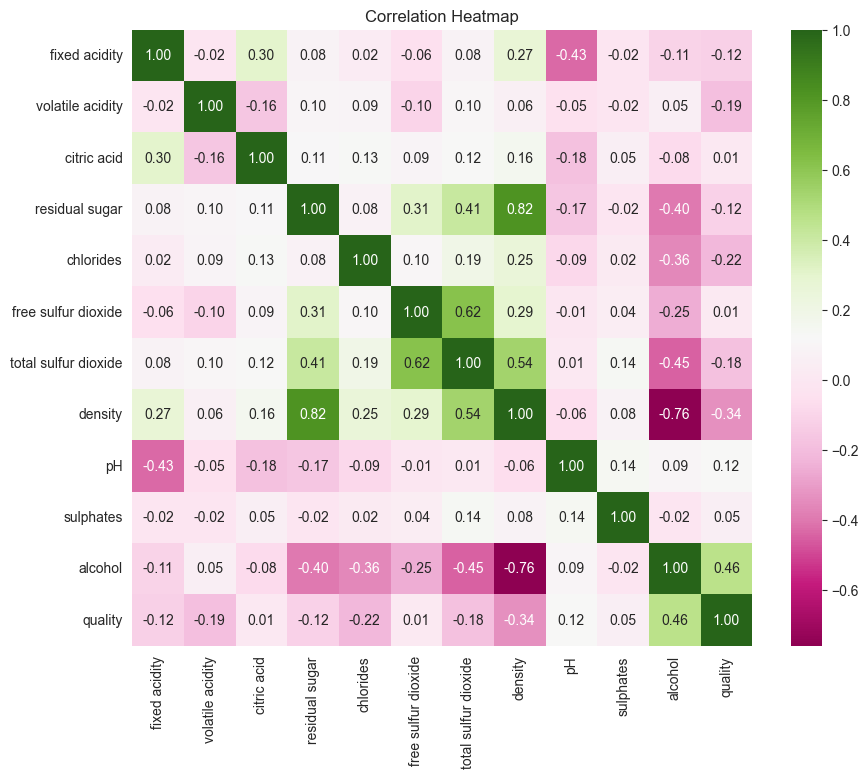

In [69]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [70]:
mean_value_of_quality = df['quality'].mean()
targets = np.where(df['quality'] > mean_value_of_quality, 1, 0)
df['quality_rate'] = targets
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_rate
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


In [71]:
x=df.drop(['quality','quality_rate'], axis=1)
y=df['quality_rate']

## Splitting the dataset into the Training set and Test set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
pickle.dump(sc, open('C:/Users/danis/Desktop/research paper/wine_work/White Wine Quality Prediction Using Python/model/standard_scaler', 'wb'))

## Training and testing out differnt models

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [76]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [77]:
from sklearn.svm import SVC
kernel_svm = SVC(kernel = 'rbf', random_state = 0)
kernel_svm.fit(X_train, y_train)

SVC(random_state=0)

In [78]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
y_rfc_pred = rfc.predict(X_test)
y_dtc_pred = dtc.predict(X_test)
y_svm_pred = svc.predict(X_test)
y_kernel_svm_pred = kernel_svm.predict(X_test)
y_knn_pred = knn.predict(X_test)
y_nb_pred =  nb.predict(X_test)
rbf_acc=accuracy_score(y_test,y_rfc_pred)
dtc_acc=accuracy_score(y_test,y_dtc_pred)
svm_acc=accuracy_score(y_test,y_svm_pred)
kernel_svm_acc=accuracy_score(y_test,y_kernel_svm_pred)
knn_acc=accuracy_score(y_test,y_knn_pred)
nb_acc=accuracy_score(y_test,y_nb_pred)

## precision calculation

In [81]:
rbf_precision=precision_score(y_test,y_rfc_pred)
dtc_precision=precision_score(y_test,y_dtc_pred)
svm_precision=precision_score(y_test,y_svm_pred)
kernel_svm_precision=precision_score(y_test,y_kernel_svm_pred)
knn_precision=precision_score(y_test,y_knn_pred)
nb_precision=precision_score(y_test,y_nb_pred)

## recall score calculation

In [82]:
rbf_recall=recall_score(y_test,y_rfc_pred)
dtc_recall=recall_score(y_test,y_dtc_pred)
svm_recall=recall_score(y_test,y_svm_pred)
kernel_svm_recall=recall_score(y_test,y_kernel_svm_pred)
knn_recall=recall_score(y_test,y_knn_pred)
nb_recall=recall_score(y_test,y_nb_pred)

## F1-Score calculation

In [83]:
rbf_f1=f1_score(y_test,y_rfc_pred)
dtc_f1=f1_score(y_test,y_dtc_pred)
svm_f1=f1_score(y_test,y_svm_pred)
kernel_svm_f1=f1_score(y_test,y_kernel_svm_pred)
knn_f1=f1_score(y_test,y_knn_pred)
nb_f1=f1_score(y_test,y_nb_pred)

In [84]:
import pandas as pd
# Create DataFrame
accuracy=[rbf_acc, dtc_acc,svm_acc, kernel_svm_acc, knn_acc, nb_acc]
precision=[rbf_precision, dtc_precision,svm_precision,kernel_svm_precision,knn_precision,nb_precision]
recall=[rbf_recall, dtc_recall,svm_recall,kernel_svm_recall,knn_recall,nb_recall]
f1=[rbf_f1, dtc_f1,svm_f1,kernel_svm_f1,knn_f1,nb_f1]
import numpy as np

# Lists of metrics
accuracy = [rbf_acc, dtc_acc, svm_acc, kernel_svm_acc, knn_acc, nb_acc]
precision = [rbf_precision, dtc_precision, svm_precision, kernel_svm_precision, knn_precision, nb_precision]
recall = [rbf_recall, dtc_recall, svm_recall, kernel_svm_recall, knn_recall, nb_recall]
f1 = [rbf_f1, dtc_f1, svm_f1, kernel_svm_f1, knn_f1, nb_f1]
Classifiers=["random forest","Decision tree", "svm", "Kernel-SVM","k-Neighbors", "naive bayes"]
# Convert lists to NumPy arrays
Classifier_array=np.array(Classifiers)
accuracy_array = np.array(accuracy)
precision_array = np.array(precision)
recall_array = np.array(recall)
f1_array = np.array(f1)
import numpy as np
import pandas as pd

# Stack the arrays horizontally
table_data = np.column_stack((Classifier_array,accuracy_array*100, precision_array*100, recall_array*100, f1_array*100))

# Create a DataFrame
scores = pd.DataFrame(table_data, columns=['Classifiers','Accuracy', 'Precision', 'Recall', 'F1'])

scores.to_csv("C:/Users/danis/Desktop/research paper/wine_work/White Wine Quality Prediction Using Python/figure and tables/score_Table.csv", index=False)
scores

,Classifiers,Accuracy,Precision,Recall,F1
0,random forest,77.49747729566094,81.02941176470588,85.42635658914729,83.16981132075472
1,Decision tree,69.3239152371342,75.63909774436091,77.98449612403101,76.79389312977099
2,svm,74.16750756811302,76.9017980636238,86.20155038759691,81.28654970760235
3,Kernel-SVM,76.28657921291625,80.05865102639295,84.65116279069768,82.29088168801808
4,k-Neighbors,72.7547931382442,77.2133526850508,82.48062015503876,79.76011994002998
5,naive bayes,68.6175580221998,75.45731707317073,76.74418604651163,76.09531129900077


In [85]:
numerical_cols = scores.iloc[:,1:].select_dtypes(include=['object'])
scores[numerical_cols.columns] = numerical_cols.apply(pd.to_numeric, errors='coerce')
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Classifiers  6 non-null      object 
 1   Accuracy     6 non-null      float64
 2   Precision    6 non-null      float64
 3   Recall       6 non-null      float64
 4   F1           6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 372.0+ bytes


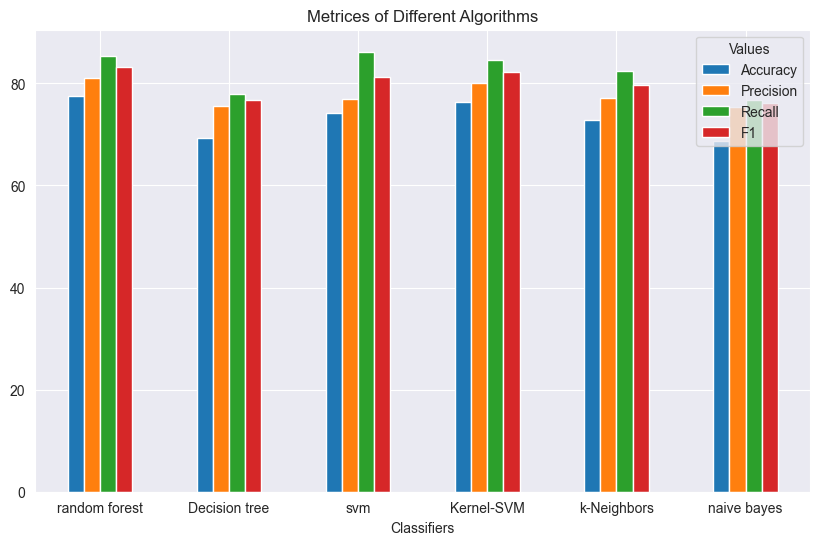

In [86]:
# Set the 'Algorithm' column as the index
scores.set_index('Classifiers', inplace=True)
# Plot the DataFrame
scores.plot(kind='bar', figsize=(10, 6))
plt.title('Metrices of Different Algorithms')
plt.xticks(rotation=0)
plt.legend(title='Values')
plt.show()


In [87]:
# exporing the model
pickle.dump(rfc, open("C:/Users/danis/Desktop/research paper/wine_work/White Wine Quality Prediction Using Python//model/rfc_model.sav", 'wb'))

In [98]:
#for testing purpose only
filtered_df = df[df['quality'] == 4]
filtered_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_rate
46,6.2,0.450,0.26,4.40,0.063,63.0,206.0,0.99400,3.27,0.52,9.8,4,0
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4,0
115,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4,0
147,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,4,0
172,7.6,0.480,0.37,0.80,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,4,0
4779,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,4,0
4804,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,4,0
4839,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,4,0
